<h1> Actividad 1: Análisis descriptivo y exploratorio de datos </h1>

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math as mt

datos = pd.read_csv("cancer.csv")
datos.columns


Index(['Sample code number', 'Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [14]:
datos.head()

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


<h2> 1. Caracterización de las distribuciones </h2>

                            count
Uniformity of Cell Size          
1                        0.546120
10                       0.098097
3                        0.076135
2                        0.065886
4                        0.055637
5                        0.043924
8                        0.040996
6                        0.036603
7                        0.027818
9                        0.008785


<Axes: xlabel='Uniformity of Cell Size', ylabel='Count'>

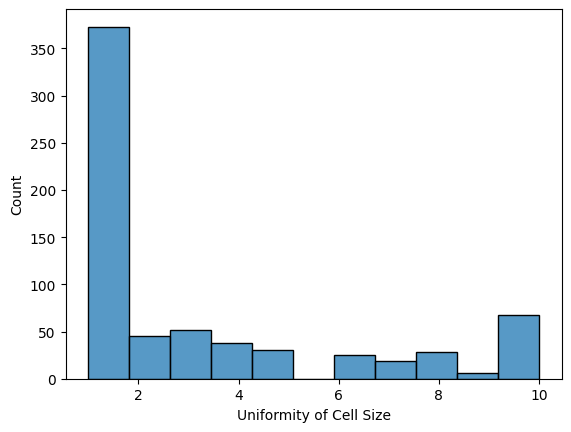

In [56]:
# Frecuencia relativa de Uniformity of Cell Size

frec_abs = datos["Uniformity of Cell Size"].value_counts()
frec_rel = frec_abs/len(datos["Uniformity of Cell Size"])
frec = pd.DataFrame(frec_rel)
print(frec)


# Histograma Uniformity of Cell Size

sns.histplot(datos["Uniformity of Cell Size"])




Es una distribución unimodal y asimétrica. Podemos ver que la mayoría de las células de este dataset (el 54,6%) presenta un tamaño de 1 unidad, mientras que los demás tamaños se presentan de una manera más uniforme en el gráfico.

<h2> 2. Medidas de dispersión </h2>

In [55]:
# Media

print("Media: ", datos["Uniformity of Cell Size"].mean())

# Varianza de Uniformity of Cell Size

print("Varianza: ", datos["Uniformity of Cell Size"].var())

# Desviación típica de Uniformity of Cell Size

print("Desviación típica: ", datos["Uniformity of Cell Size"].std())

# Coeficiente de variación

print("Coeficiente de variación: ", (datos["Uniformity of Cell Size"].std()/datos["Uniformity of Cell Size"].mean())*100,"%")



Media:  3.150805270863836
Varianza:  9.39511298695165
Desviación típica:  3.0651448557860443
Coeficiente de variación:  97.28131675194555 %


Estos resultados indican que los datos de uniformidad del tamaño de célula se encuentran muy dispersos respecto a la media. 

<h2> 3. Valores atípicos </h2>

1º cuartil:  2.0
3º cuartil:  5.0
Rango intercuarítlico:  3.0
Extremo izquierdo:  9.5
Valores atípicos:  Bland Chromatin
10    20
Name: count, dtype: int64


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
167,1200847,6,10,10,10,8,10,10,10,7,4
208,1222047,10,10,10,10,3,10,10,6,1,4
253,263538,5,10,10,6,10,10,10,6,5,4
276,527363,8,10,10,10,8,10,10,7,3,4
410,1258549,9,10,10,10,10,10,10,10,1,4


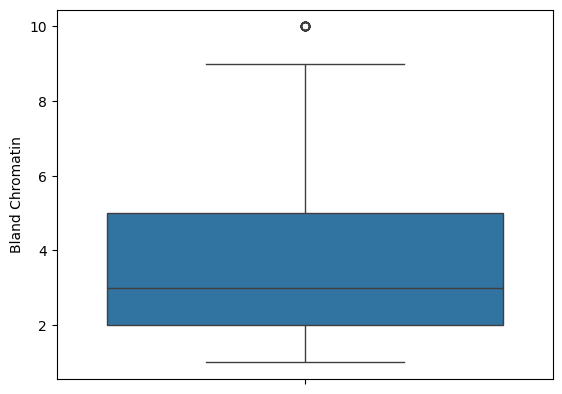

In [72]:
# Diagrama de caja y bigotes de Clump Thickness

sns.boxplot(datos["Bland Chromatin"])

# Calcula el rango intercuartil (IQR)

q1 = datos["Bland Chromatin"].quantile(0.25)
print("1º cuartil: ", q1)

q3 = datos["Bland Chromatin"].quantile(0.75)
print("3º cuartil: ", q3)

iqr = q3-q1
print("Rango intercuarítlico: ", iqr)

# Extremo del bigote derecho

max = q3 + 1.5 * iqr
print("Extremo izquierdo: ", max)

# Filtramos los valores atípicos

atipicos = datos[datos["Bland Chromatin"] > max]
print("Valores atípicos: ", atipicos["Bland Chromatin"].value_counts())
atipicos.head()

De aquí concluimos que hay 20 valores atípicos (Bland Chromatine = 10), y que el 50% de los valores se concentran entre el 2 y el 5, siendo 9.5 el máximo

1º cuartil:  2.0
3º cuartil:  4.0
Rango intercuarítlico:  2.0
Extremo izquierdo:  7.0
Valores atípicos:  Single Epithelial Cell Size
10    31
8     21
9      2
Name: count, dtype: int64


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
31,1072179,10,7,7,3,8,5,7,4,3,4
40,1100524,6,10,10,2,8,10,7,3,3,4
41,1102573,5,6,5,6,10,1,3,1,1,4
42,1103608,10,10,10,4,8,1,8,10,1,4
51,1110503,5,5,5,8,10,8,7,3,7,4


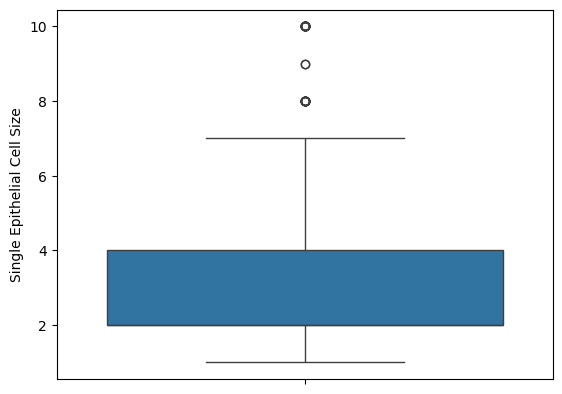

In [74]:
# Diagrama de caja y bigotes de Single Epithelial Cell Size

sns.boxplot(datos["Single Epithelial Cell Size"])

# Calcula el rango intercuartil (IQR)

q1 = datos["Single Epithelial Cell Size"].quantile(0.25)
print("1º cuartil: ", q1)

q3 = datos["Single Epithelial Cell Size"].quantile(0.75)
print("3º cuartil: ", q3)

iqr = q3-q1
print("Rango intercuarítlico: ", iqr)

# Extremo del bigote derecho

max = q3 + 1.5 * iqr
print("Extremo izquierdo: ", max)

# Filtramos los valores atípicos

atipicos = datos[datos["Single Epithelial Cell Size"] > max]
print("Valores atípicos: ", atipicos["Single Epithelial Cell Size"].value_counts())
atipicos.head()


Tras analizar el boxplot y los valores atípicos, concluimos que hay 54 valores atípicos, es decir: Single Epithelial Cell Size = {8,9,10}.

El 50% de los valores se concentran entre el 2 y el 4, siendo 7.5 el máxmimo.

<h1> 4. Correlación entre variables </h1>

In [138]:
import plotly.express as px
from pandas.plotting import parallel_coordinates

# Gráfico de coordenadas paralelas
fig = px.parallel_coordinates(datos, dimensions=list(datos.columns))
fig.show()

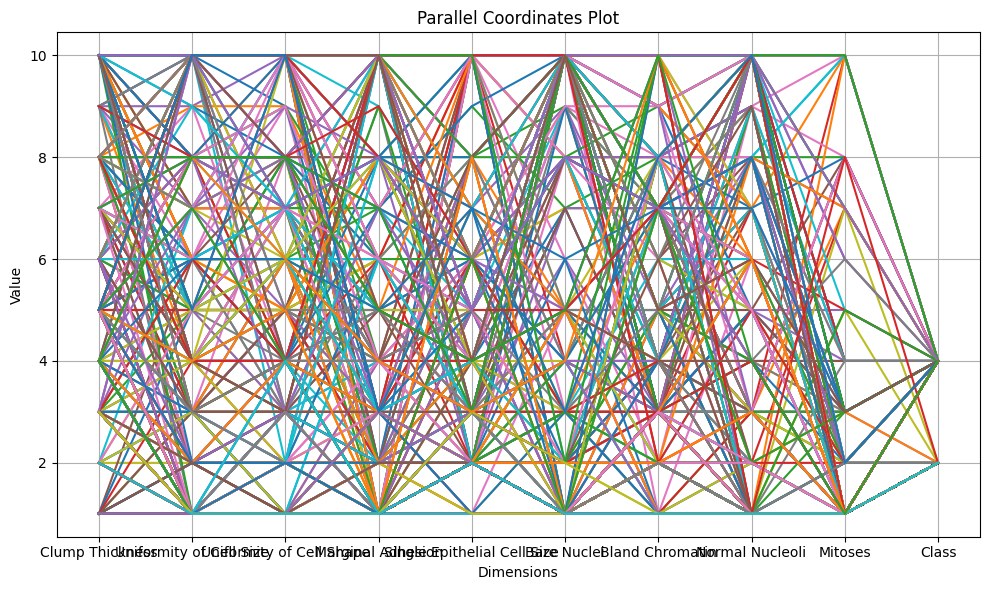

In [130]:
# Funcion para graficar coordenadas paralelas def plot_parallel(data,labels): 
def plot_parallel(datos, labels=None):
    """
    Creamos gráfico de coordenadas paralelas usando pandas y matplotlib
    """

    # Comprobamos que nuestro dataset sea un DataFrame
    if not isinstance(datos, pd.DataFrame):
        raise TypeError("Input data must be a pandas DataFrame.")

    # Creamos el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    # Option 1: Remove colormap argument (default colors)
    lines = ax.plot(datos.columns, datos.T)

    # Option 2: Color lines individually (optional)
    # for i, line in enumerate(lines):
    #     # Example: Color lines based on the first column value
    #     color = 'blue' if data.iloc[i, 0] > 5 else 'red'
    #     line.set_color(color)

    # Add labels if provided
    if labels is not None:
        ax.set_xticks(range(len(datos.columns)))
        ax.set_xticklabels(datos.columns, rotation=90)
        if len(labels) == len(datos):
            for i, label in enumerate(labels):
                ax.text(i, datos.iloc[i].min(), label, ha='center', va='bottom')

    # Customize plot appearance
    plt.title("Gráfico de coordenadas paralelas")
    plt.xlabel("Dimensiones")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.tight_layout()

    # Display the plot
    plt.show()

datos_sin_samplecode = datos[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']]

plot_parallel(datos_sin_samplecode)



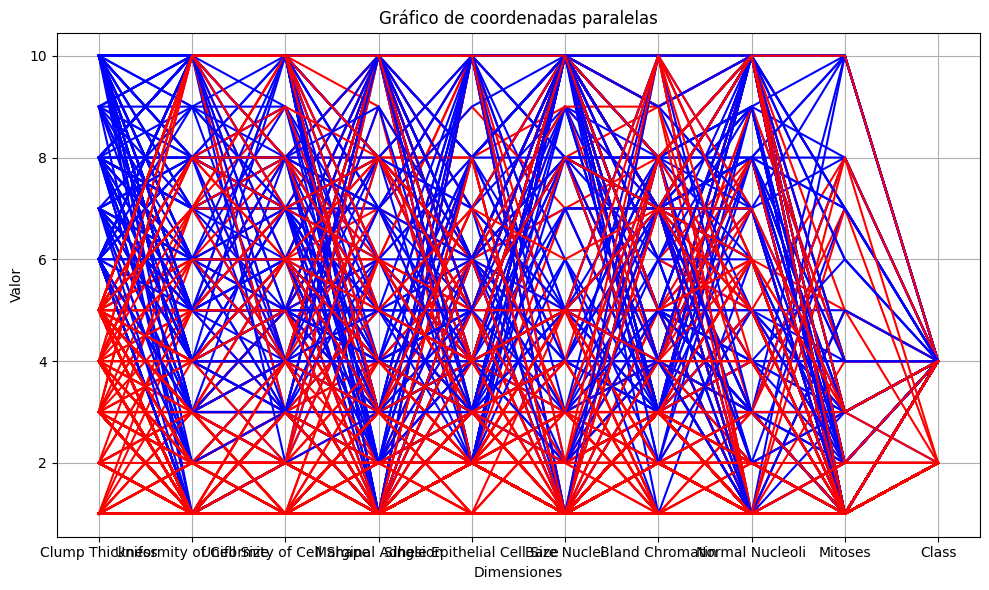

In [137]:
# Funcion para graficar coordenadas paralelas def plot_parallel(data,labels): 
def plot_parallel(datos, labels=None):
    """
    Creamos gráfico de coordenadas paralelas usando pandas y matplotlib
    """

    # Comprobamos que nuestro dataset sea un DataFrame
    if not isinstance(datos, pd.DataFrame):
        raise TypeError("Input data must be a pandas DataFrame.")

    # Creamos el gráfico
    fig, ax = plt.subplots(figsize=(10, 6))

    lines = ax.plot(datos.columns, datos.T)
    for i, line in enumerate(lines):
        color = 'blue' if datos.iloc[i, 0] > 5 else 'red'
        line.set_color(color)

    # Añadimos etiquetas
    if labels is not None:
        ax.set_xticks(range(len(datos.columns)))
        ax.set_xticklabels(datos.columns, rotation=90)
        if len(labels) == len(datos):
            for i, label in enumerate(labels):
                ax.text(i, datos.iloc[i].min(), label, ha='center', va='bottom')

    # Personalizamos el gráfico
    plt.title("Gráfico de coordenadas paralelas")
    plt.xlabel("Dimensiones")
    plt.ylabel("Valor")
    plt.grid(True)
    plt.tight_layout()

    # Mostramos el gráfico
    plt.show()

datos_sin_samplecode = datos[['Clump Thickness', 'Uniformity of Cell Size',
       'Uniformity of Cell Shape', 'Marginal Adhesion',
       'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
       'Normal Nucleoli', 'Mitoses', 'Class']]

plot_parallel(datos_sin_samplecode)



In [109]:
# Matriz de correlaciones

datos.corr()


,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
Sample code number,1.000000,-0.056350,-0.041396,-0.042221,-0.069630,-0.048644,-0.099248,-0.061966,-0.050699,-0.037972,-0.084701
Clump Thickness,-0.056350,1.000000,0.642481,0.653470,0.487829,0.523596,0.593091,0.553742,0.534066,0.350957,0.714790
Uniformity of Cell Size,-0.041396,0.642481,1.000000,0.907228,0.706977,0.753544,0.691709,0.755559,0.719346,0.460755,0.820801
Uniformity of Cell Shape,-0.042221,0.653470,0.907228,1.000000,0.685948,0.722462,0.713878,0.735344,0.717963,0.441258,0.821891
Marginal Adhesion,-0.069630,0.487829,0.706977,0.685948,1.000000,0.594548,0.670648,0.668567,0.603121,0.418898,0.706294
Single Epithelial Cell Size,-0.048644,0.523596,0.753544,0.722462,0.594548,1.000000,0.585716,0.618128,0.628926,0.480583,0.690958
Bare Nuclei,-0.099248,0.593091,0.691709,0.713878,0.670648,0.585716,1.000000,0.680615,0.584280,0.339210,0.822696
Bland Chromatin,-0.061966,0.553742,0.755559,0.735344,0.668567,0.618128,0.680615,1.000000,0.665602,0.346011,0.758228
Normal Nucleoli,-0.050699,0.534066,0.719346,0.717963,0.603121,0.628926,0.584280,0.665602,1.000000,0.433757,0.718677
Mitoses,-0.037972,0.350957,0.460755,0.441258,0.418898,0.480583,0.339210,0.346011,0.433757,1.000000,0.423448


<Axes: >

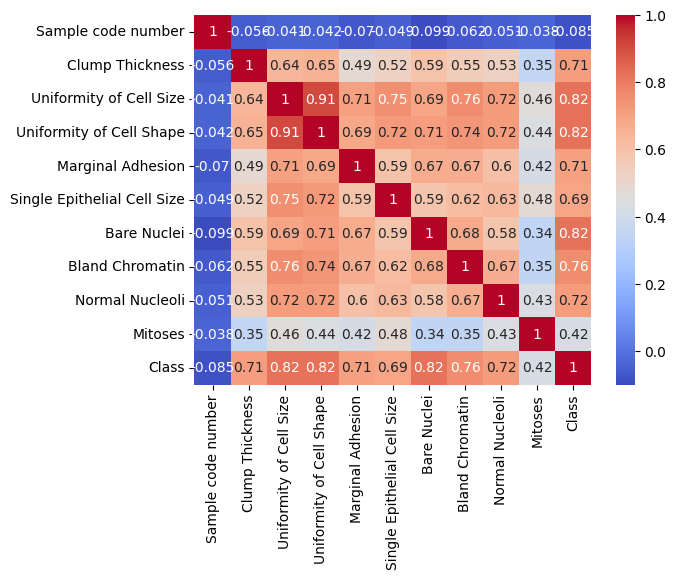

In [111]:
# Mapa de calor de matriz de correlaciones

sns.heatmap(datos.corr(),cmap="coolwarm", annot=True)

**Correlaciones (positivas)**: 
- Uniformity of Cell Size y Uniformity of Cell Shape (0.91)
- La variable Class con:
    (0.82)
    - Uniformity of Cell Size
    - Uniformity of Cell Shape
    - Bare Nuclei 
    